# Übungsblatt 2 - Datenverarbeitung und -analyse


In diesem Übungsblatt decken wir mit Datenanalyse, -verarbeitung und -visualisierung Teil II der Vorlesungsinhalte ab.


Die Abgabe ist bis zum **11. Dezember um 24 Uhr** über Moodle möglich.<br/>
Bitte gebt Python Code oder Jupyternotebooks (Filetypen *.py* oder *.ipynb*) ab.

Bestanden hat wer mindestens 40% der Gesamtpunktzahl, also 6 Punkte, erreicht. Der Kurs insgesamt wird nicht benotet sondern muss nur bestanden werden.

**Identische Abgaben werden nicht gewertet.**

# Netflix Daten

In diesem Übungsblatt analysieren wir Netflixdaten.
Diese sind auf Kaggle verfügbar und können [hier](https://www.kaggle.com/datasets/shivamb/netflix-shows) as `csv` Datei heruntergeladen werden.

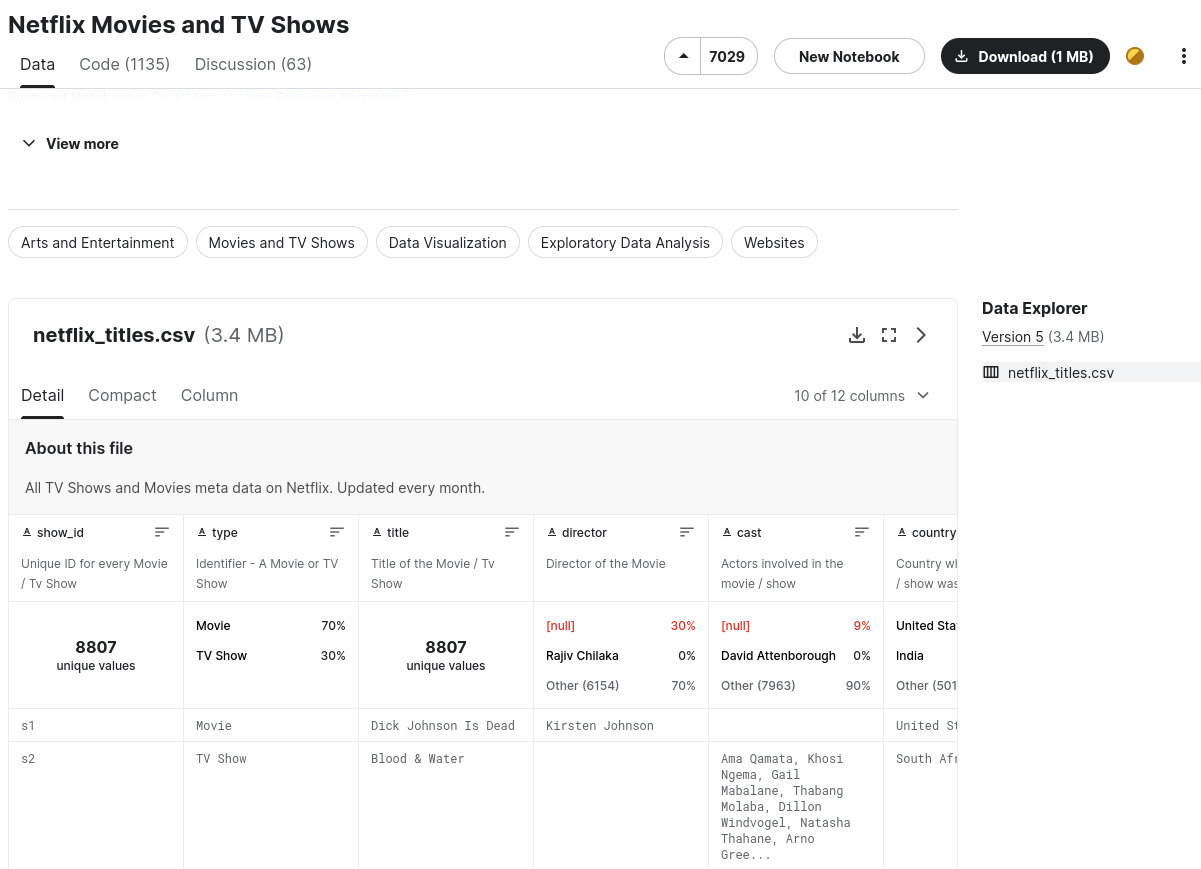


Für die folgenden Aufgaben nutzt bitte `pandas`.

## Daten lesen & säubern

**Lese die Daten mithilfe von `pandas` ein und zeige die ersten 10 Zeilen an.** (0.5 Punkt)

**Wie viele Zeilen hat der Datensatz? Wie heißen die Spalten?** (0.5 Punkt)

**Lösche die folgenden Spalten aus dem DataFrame: `show_id`, `cast`, `listed_in`,`rating`, `Unnamed: 12`** (0.5 Punkte)

**Sortiere die Daten nach folgenden Kriterien: erst `release_year` (aufsteigend), dann `type` (absteigend), dann `title` (aufsteigend). Zeige die ersten 20 Zeilen an.** (0.5 Punkte)

**Wie viele `NaN` Werte befinden sich in jeder Spalte?** (0.5 Punkte)

**Ersetze alle `NaN` Werte mit `No Data`** (0.5 Punkte)

**Wende `.describe()` auf den Datensatz an.
Beschreibe zwei Erkenntnisse die du daran ablesen kannst.** (1 Punkt)

## Datenanalyse

**Bei wie vielen Filmen ist `Youssef Chahine` als Regisseur gelistet?**

**Zeige alle Filmtitel von ihm an.** (1 Punkt)

**Bei wie vielen Filmen haben mehrere Regisseure mitgewirkt?** (2 Punkte)

**Ansatz**: Falls mehrere Regisseure am Werk enthält der Wert in der Spalte `director` mindestens ein Komma.

1. Schreibe eine Funktion die True zurückgibt (kein print!) sobald ein Komma in einem **beliebigen Text**, der als Argument übergeben wir, vorkommt
2. Wende diese Funktion mihilfe von `.apply()` auf alle Werte in der Spalte `director` an. Speichere das Ergebnis.
3. Erstelle einen neuen DataFrame, der nur die Zeilen enthält in denen das Ergebnis aus Aufgabe 2 wahr ist. Ermittle davon die Anzahl an Zeilen.

**Berechne das früheste Veröffentlichungsdatum für alle Regisseur:innen oder gelisteten Gruppen. Sortiere das Ergebnis chronologisch** (1 Punkt)

Hinweis: Verwende `.groupby()` um das mit einer Zeile Code zu lösen.

**In welchem Land werden die meisten Filme (nicht TV Shows) für Netflix produziert?** (1 Punkt)

**Erstelle einen Bar Plot mit den Top 10 Länder und ihrem prozentualen Anteil an der Filmproduktion.** (Punkt 1)

**Bonus:** Denke dir eine beliebige Recherchefrage aus und beantworte sie mit dem Datensatz. Für einen Plot gibt es einen Zusatzpunkt. (1 Punkt)

## Datenvisualisierung

Die folgende Visualisierung ist von https://www.kaggle.com/code/joshuaswords/netflix-data-visualization übernommen. Wir wollen sie anpassen, so dass sie unseren Anforderungen entspricht.

Keine Angst! - Du musst nicht alles verstehen. Es geht viel mehr darum, die wichtigsten Komponenten zu erkennen und abzuändern zu können. Unterschiedliche Werte einsetzen, Zeilen auskommentieren und den Code immer wieder auszuführen hilft dabei. 

Los geht's. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('netflix_titles.csv')

# Transform date to timestamp and extract the year and the month
data["date_added"] = pd.to_datetime(data['date_added'])
data['month_added']= data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year

# Create Graph
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

# Add data for each movie type
for i, mtv in enumerate(data['type'].value_counts().index):
    mtv_rel = data[data['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

# Fix visuals
ax.yaxis.tick_right()
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

# Add context for better understanding
fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

# Add legend
fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color=color[0])
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color=color[1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

### Aufgaben

Führe den Code aus und passe ihn wie folgt an:

- Ändere den Titel des Plots in `Veröffentlichte Netflix Filme und TV Shows` und die Schriftart in Arial um.
- Enfterne die Bildbeschreibung (`We see a slow....`) und ändere die Farbe für Filme in der Grafik in eine beliebige Farbe um
- Was passiert wenn du Zeile `22` auskommentierst? Wofür stehen `ax` und `yaxis`?
- In der Grafik sehen wir die Veränderung über die Jahre hinweg. Ändere den Code so ab, dass der Graph die veröffentlichten Filme und TV Shows pro Jahr anzeigt. Nutze hierfür die Spalte `month_added`.
- Schiebe den Titel und den Text `Movie | TV Show` soweit nach oben, dass sie nicht den Graph überdecken.


5 Punkte (pro Aufgabe ein Punkt)